# Sieć Dwuwarstwowa

### Import potrzebnych bibliotek

In [1]:

import pandas as pd
import numpy as np

from Siec_dwuwarstwowa.init2 import init2
from Siec_dwuwarstwowa.dzialaj2 import calculate_outputs
from Siec_dwuwarstwowa.ucz2 import ucz2

### Załadowanie danych uczących

### Przykład XOR

In [2]:
P = np.array([[0,0,1,1], 
              [0,1,0,1]] )  # Wejścia sieci

T = np.array([0,1,1,0])   # żądane wyjście sieci


### Inicjalizacja macierzy wag dla każdej z warstw

In [3]:
W1_matrix, W2_matrix = init2(2, 2, 1)

print(W1_matrix)
print(W2_matrix)
print(P[:,0])

[[ 0.07806545  0.02564814 -0.09125117]
 [ 0.01695056 -0.01547582 -0.03453875]]
[[-0.05809719 -0.09542025  0.0026547 ]]
[0 0]


In [4]:
W1 = np.array([[0.05, -0.21, -1],
             [-0.61, 0.01,  -1]])
    
X1 = [0, 0, -1]

print(np.dot(W1,X1))

[1. 1.]


In [5]:
Y1, Y2a = calculate_outputs(W1_matrix, W2_matrix, P[:, 0] )
print(Y1)
print(Y2a)
Y1, Y2a = calculate_outputs(W1_matrix, W2_matrix, P[:, 1] )
print(Y1)
print(Y2a)
Y1, Y2a = calculate_outputs(W1_matrix, W2_matrix, P[:, 2] )
print(Y1)
print(Y2a)
Y1, Y2a = calculate_outputs(W1_matrix, W2_matrix, P[:, 3] )
print(Y1)
print(Y2a)

[ 0.61212558  0.54306646 -1.        ]
[0.38931677]
[ 0.6421014   0.52381063 -1.        ]
[0.38943076]
[ 0.69984987  0.5640085  -1.        ]
[0.38091668]
[ 0.72607993  0.54489562 -1.        ]
[0.38127031]


In [6]:
W1po, W2po, mse_history = ucz2(W1_matrix, W2_matrix, P, T, 20000, 1e-9)

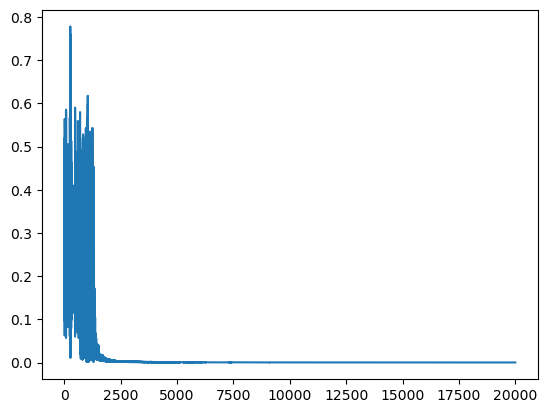

In [7]:
import matplotlib.pyplot as plt

plt.plot(mse_history)
plt.show()

In [8]:
_, Y2a = calculate_outputs(W1po, W2po, P[:, 0] )
print(f"dla wejścia XOR(0,0) = {Y2a}   (oczekiwane 0)")
_, Y2a = calculate_outputs(W1po, W2po, P[:, 1] )
print(f"dla wejścia XOR(0,1) = {Y2a}   (oczekiwane 1)")
_, Y2a = calculate_outputs(W1po, W2po, P[:, 2] )
print(f"dla wejścia XOR(1,0) = {Y2a}   (oczekiwane 1)")
_, Y2a = calculate_outputs(W1po, W2po, P[:, 3] )
print(f"dla wejścia XOR(1,1) = {Y2a}   (oczekiwane 0)")

dla wejścia XOR(0,0) = [0.00966324]   (oczekiwane 0)
dla wejścia XOR(0,1) = [0.99017681]   (oczekiwane 1)
dla wejścia XOR(1,0) = [0.99005791]   (oczekiwane 1)
dla wejścia XOR(1,1) = [0.01239909]   (oczekiwane 0)


### TITANIC

In [9]:
# TITANIC
import pandas as pd
pd.read_csv("../titanic/train.csv")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
titanic_data = pd.read_csv("../titanic/train.csv")

In [11]:
target = 'Survived'

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [12]:
titanic_data['Sex'] = titanic_data['Sex'].map({'male':0, 'female':1})
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True)
titanic_data['Fare'].fillna(titanic_data['Fare'].mean(), inplace=True)


In [13]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,C


In [207]:
from sklearn.preprocessing import StandardScaler
X = titanic_data[features].values.T
X = StandardScaler().fit_transform(X)
y = titanic_data[target].values


In [208]:
print(X[:,0])
print(y[0])
print(len(y))

[-0.32708363 -0.71314954  2.11800053 -0.5844609  -0.71314954  0.21984309]
0
891


In [225]:
W1_matrix_titanic, W2_matrix_titanic = init2(6, 50, 1)

In [226]:
W1po, W2po, mse_history = ucz2(W1_matrix_titanic, W2_matrix_titanic, X, y, 200000, 0)

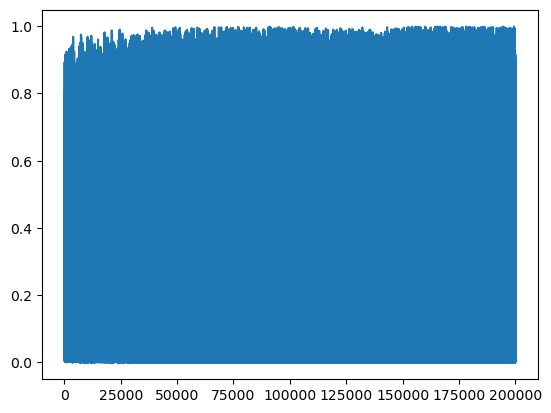

In [224]:
import matplotlib.pyplot as plt

plt.plot(mse_history)
plt.show()

In [213]:
_, Y2a = calculate_outputs(W1po, W2po, X[:, 0] )
print(f" wynik = {Y2a}   (oczekiwane {y[0]})")

_, Y2a = calculate_outputs(W1po, W2po, X[:, 10] )
print(f" wynik = {Y2a}   (oczekiwane {y[10]})")

 wynik = [0.15016717]   (oczekiwane 0)
 wynik = [0.84506569]   (oczekiwane 1)


In [214]:
# Dane testowe
dane_testowe = pd.read_csv("../titanic/test.csv")


In [215]:
testy_x = dane_testowe[features].values.T
testy_x = StandardScaler().fit_transform(X)

In [216]:
print(len(dane_testowe))

418


In [217]:
# _, Y2a = calculate_outputs(W1po, W2po, testy_x[:, 14] )
# print(f"{dane_testowe['PassengerId'][14]}")
# print(f" wynik (testowy zbior) = {Y2a} ")

ID = []
wynik = []
for i in range(len(dane_testowe)):  #418 
    _,out = calculate_outputs(W1po, W2po, testy_x[:,i])
    wynik.append(out)
    ID.append(dane_testowe['PassengerId'][i])
    

In [218]:
gender_submission = pd.read_csv("../titanic/gender_submission.csv")
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [219]:
print(ID[0])
print(gender_submission['PassengerId'].iloc[0])

print(wynik[0])
print(gender_submission['Survived'][0])


892
892
[0.15016717]
0


In [220]:
wynik = [1 if val >= 0.5 else 0 for val in wynik]

In [221]:
good_predictions = 0
bad_predictions = 0

for i in range(418):
    if(ID[i] == gender_submission['PassengerId'].iloc[i]):
        if wynik[i] == gender_submission['Survived'].iloc[i]:
            good_predictions += 1
        else:
            bad_predictions += 1
        

In [222]:
print(good_predictions)
print(bad_predictions)

227
191
